In [4]:
import argparse
import time
import matplotlib.pyplot as plt
import numpy as np
import optparse
from dotenv import load_dotenv

from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds, BrainFlowPresets
from brainflow import ml_model
from brainflow.ml_model import *


In [5]:
load_dotenv()

True

In [16]:
BoardShim.enable_dev_board_logger()

board_id = 0
serial_port = os.getenv("SERIAL_PORT")

params = BrainFlowInputParams()
params.serial_port = serial_port
board = BoardShim(board_id, params)
board.prepare_session()
sampling_rate = board.get_sampling_rate(board_id)   # per second, presumably

In [17]:
board.start_stream ()
time.sleep(2)
# data = board.get_current_board_data (256) # get latest 256 packages or less, doesnt remove them from internal buffer
data = board.get_board_data()  # get all data and remove it from internal buffer
board.stop_stream()
board.release_session()

In [46]:
model = MLModel(BrainFlowModelParams(0, 0))
model.prepare()
prediction = model.predict(data)
model.release()
prediction

array([1.])

In [8]:
data
# data.to_csv('temp_data.csv', index=False, header=False)

array([[ 0.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
         1.02000000e+02,  1.03000000e+02,  1.04000000e+02],
       [-6.21903762e+04, -3.65671410e+04, -9.72791952e+04, ...,
        -9.65298082e+04, -7.30945630e+04, -9.65225663e+04],
       [-3.26300600e+04, -3.78545121e+04, -7.38394572e+04, ...,
        -7.38590150e+04, -7.54332260e+04, -7.38539858e+04],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.70942015e+09,  1.70942015e+09,  1.70942015e+09, ...,
         1.70942015e+09,  1.70942015e+09,  1.70942015e+09],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [23]:
data.shape

(24, 2476)

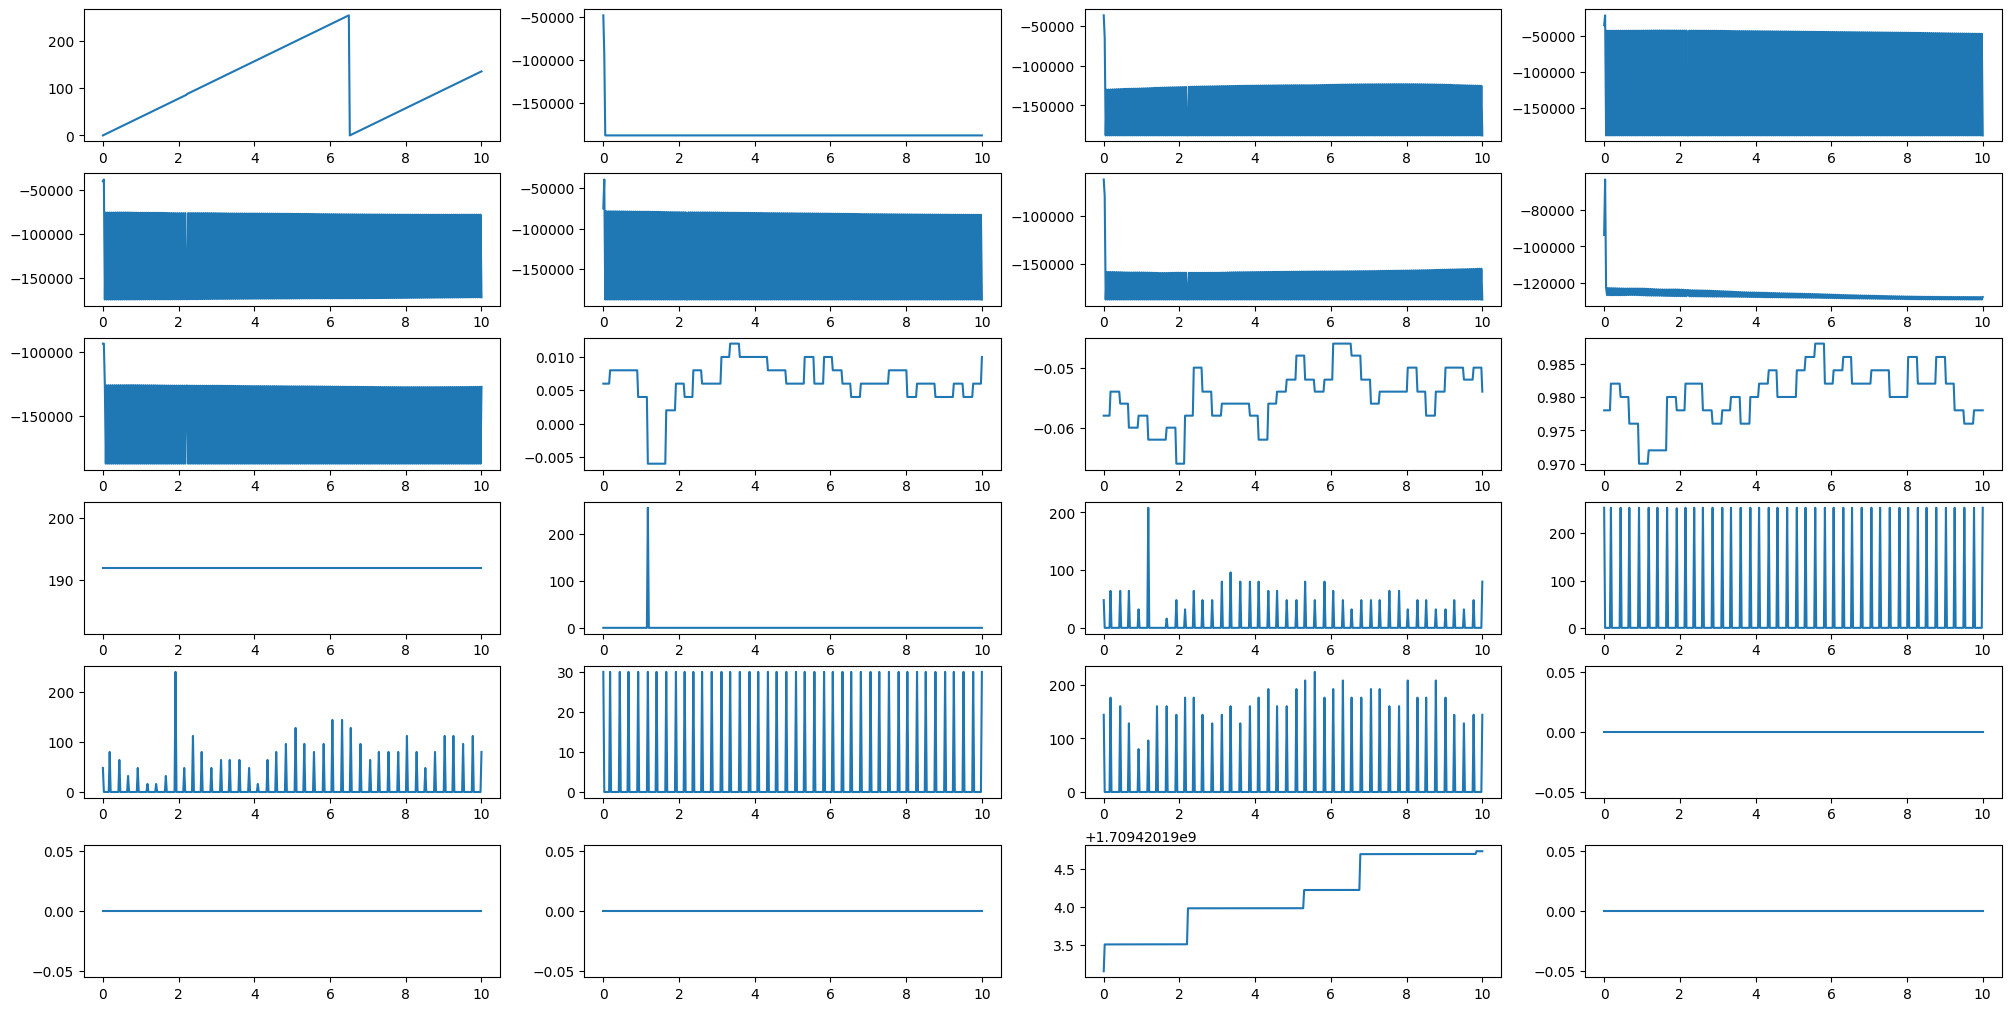

In [13]:
fig, axs = plt.subplots(6, 4, constrained_layout=True, figsize=(20, 10))
for i in range(6):
    for j in range(4):
        d = data[4 * i + j]
        axs[i][j].plot(np.linspace(0, 10, len(d)), d)

In [11]:
board.get_eeg_channels(board_id)

[1, 2, 3, 4, 5, 6, 7, 8]